In [13]:
import os
import fnmatch
import numpy as np
import pandas as pd

In [76]:
import math 

In [14]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import googlemaps
import reverse_geocoder

import pandas_profiling as pp
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

In [7]:
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)

In [8]:
taxi = pd.read_csv("TaxiMach_Link_Dataset_Full_201709.txt")

FileNotFoundError: [Errno 2] File b'TaxiMach_Link_Dataset_Full_201709.txt' does not exist: b'TaxiMach_Link_Dataset_Full_201709.txt'

In [ ]:
taxi.shape

http://openapi.seoul.go.kr:8088/sample/xml/ListTaxiDrivingDataset/1/5/

In [ ]:
test = pd.read_csv('taxi.txt', delimiter='\t')

In [ ]:
taxi.head()

In [15]:
link = pd.read_csv("Link_WGS84_Link_Info_150M.txt")

In [16]:
link.drop(columns='Y_PART',inplace=True)

In [17]:
col_names=['X_MAX', 'Y_MAX', 'X_MIN', 'Y_MIN', 'X_PART', 'Y_PART']

In [18]:
link.columns=col_names

In [19]:
link.head()

,X_MAX,Y_MAX,X_MIN,Y_MIN,X_PART,Y_PART
T_146396,127.029931,37.608843,127.029098,37.607772,127.0299312^127.0298495^127.0296241^127.0290984^,37.6088426^37.6087194^37.6084175^37.6077722^
T_146397,127.030038,37.608754,127.029194,37.607722,127.0291944^127.0299679^127.0300384^,37.6077224^37.6086594^37.6087537^
T_146398,127.031212,37.607221,127.030910,37.606225,127.0309100^127.0312121^,37.6072213^37.6062248^
T_146399,127.042422,37.597773,127.041197,37.597707,127.0411967^127.0418686^127.0424217^,37.5977734^37.5977384^37.5977068^
T_146400,127.042428,37.597893,127.041203,37.597827,127.0424283^127.0418751^127.0412033^,37.5978266^37.5978583^37.5978932^


In [20]:
link.shape

(37895, 6)

In [21]:
37895*24

909480

In [22]:
# Split X_PART, Y_PART

In [23]:
a=link.columns = ["_".join(x) for x in range(i)]

NameError: name 'i' is not defined

In [24]:
link[i+'_x'] = link.X_PART.str.split("^",n=4,expand=True)[i]

NameError: name 'i' is not defined

In [25]:
link.head()

,X_MAX,Y_MAX,X_MIN,Y_MIN,X_PART,Y_PART
T_146396,127.029931,37.608843,127.029098,37.607772,127.0299312^127.0298495^127.0296241^127.0290984^,37.6088426^37.6087194^37.6084175^37.6077722^
T_146397,127.030038,37.608754,127.029194,37.607722,127.0291944^127.0299679^127.0300384^,37.6077224^37.6086594^37.6087537^
T_146398,127.031212,37.607221,127.030910,37.606225,127.0309100^127.0312121^,37.6072213^37.6062248^
T_146399,127.042422,37.597773,127.041197,37.597707,127.0411967^127.0418686^127.0424217^,37.5977734^37.5977384^37.5977068^
T_146400,127.042428,37.597893,127.041203,37.597827,127.0424283^127.0418751^127.0412033^,37.5978266^37.5978583^37.5978932^


In [26]:
link['X_part_0'] = link.X_PART.str.split("^",n=4,expand=True)[0]
link['X_part_1'] = link.X_PART.str.split("^",n=4,expand=True)[1]
link['X_part_2'] = link.X_PART.str.split("^",n=4,expand=True)[2]
link['Y_part_0'] = link.Y_PART.str.split("^",n=4,expand=True)[0]
link['Y_part_1'] = link.Y_PART.str.split("^",n=4,expand=True)[1]
link['Y_part_2'] = link.Y_PART.str.split("^",n=4,expand=True)[2]

In [27]:
link.head()

,X_MAX,Y_MAX,X_MIN,Y_MIN,X_PART,Y_PART,X_part_0,X_part_1,X_part_2,Y_part_0,Y_part_1,Y_part_2
T_146396,127.029931,37.608843,127.029098,37.607772,127.0299312^127.0298495^127.0296241^127.0290984^,37.6088426^37.6087194^37.6084175^37.6077722^,127.0299312,127.0298495,127.0296241,37.6088426,37.6087194,37.6084175
T_146397,127.030038,37.608754,127.029194,37.607722,127.0291944^127.0299679^127.0300384^,37.6077224^37.6086594^37.6087537^,127.0291944,127.0299679,127.0300384,37.6077224,37.6086594,37.6087537
T_146398,127.031212,37.607221,127.030910,37.606225,127.0309100^127.0312121^,37.6072213^37.6062248^,127.0309100,127.0312121,,37.6072213,37.6062248,
T_146399,127.042422,37.597773,127.041197,37.597707,127.0411967^127.0418686^127.0424217^,37.5977734^37.5977384^37.5977068^,127.0411967,127.0418686,127.0424217,37.5977734,37.5977384,37.5977068
T_146400,127.042428,37.597893,127.041203,37.597827,127.0424283^127.0418751^127.0412033^,37.5978266^37.5978583^37.5978932^,127.0424283,127.0418751,127.0412033,37.5978266,37.5978583,37.5978932


In [47]:
import json
import folium

In [48]:
seoul_map = folium.Map(location=[37.5102, 126.982], zoom_start=11)

for n in link1.index:
    folium.Marker([link1['X_MAX'][n], 
                   link1['Y_MAX'][n]]).add_to(seoul_map)

NameError: name 'link1' is not defined

In [56]:
link1 = link[['X_MAX','Y_MAX']]

link2 = link[['X_MIN','Y_MIN']]

In [57]:
link3 = link[['X_part_0','Y_part_0']]
link4 = link[['X_part_1','Y_part_1']]

In [58]:
link3.X_part_0=link3.X_part_0.astype('float')
link3.Y_part_0=link3.Y_part_0.astype('float')
link4.X_part_1=link4.X_part_1.astype('float')
link4.Y_part_1=link4.Y_part_1.astype('float')

In [60]:
g_info1 = [Point(i) for i in zip(link1['X_MAX'],link1['Y_MAX'])]

geo_link = gpd.GeoDataFrame(link1,
                          crs = {'init' : 'epsg:4326'},
                          geometry = g_info1
                         )
geo_link.head()

,X_MAX,Y_MAX,geometry
T_146396,127.029931,37.608843,POINT (127.0299311759 37.6088426369)
T_146397,127.030038,37.608754,POINT (127.0300383738 37.60875370719999)
T_146398,127.031212,37.607221,POINT (127.0312121491 37.6072212719)
T_146399,127.042422,37.597773,POINT (127.0424217382 37.597773421)
T_146400,127.042428,37.597893,POINT (127.0424282596 37.5978932434)


In [61]:
geo_link.reset_index(inplace=True)

In [62]:
geo_link.rename({"index":"id"}, axis=1, inplace=True)

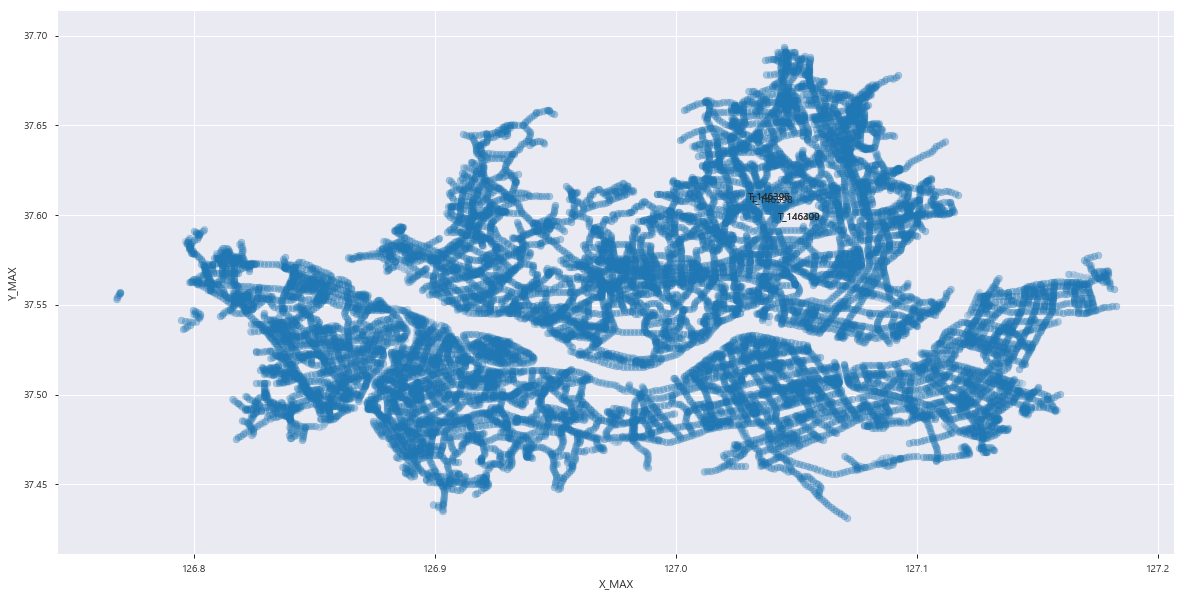

In [63]:
plt.figure(figsize = (20,10))
plt.scatter(geo_link['X_MAX'],
            geo_link['Y_MAX'],
            cmap = "YlOrRd",
            alpha = 0.2)
plt.xlabel('X_MAX')
plt.ylabel('Y_MAX')

for i in range(len(geo_link['id'][:5])):
    plt.text(geo_link['X_MAX'][i],geo_link['Y_MAX'][i],geo_link['id'][i])

In [64]:
g_info2 = [Point(i) for i in zip(link2['X_MIN'],link2['Y_MIN'])]

geo_link2 = gpd.GeoDataFrame(link2,
                          crs = {'init' : 'epsg:4326'},
                          geometry = g_info2
                         )
geo_link2.head()

,X_MIN,Y_MIN,geometry
T_146396,127.029098,37.607772,POINT (127.0290984469 37.6077721849)
T_146397,127.029194,37.607722,POINT (127.029194358 37.6077224247)
T_146398,127.030910,37.606225,POINT (127.0309099998 37.6062248139)
T_146399,127.041197,37.597707,POINT (127.0411967384 37.5977067552)
T_146400,127.041203,37.597827,POINT (127.0412032602 37.5978265775)


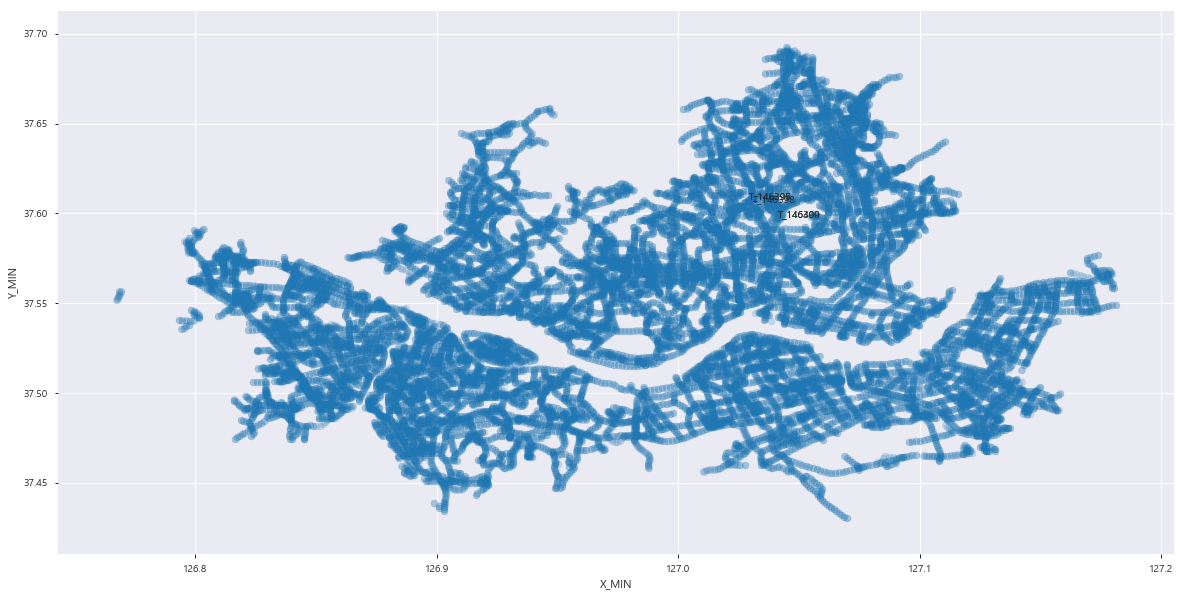

In [65]:
plt.figure(figsize = (20,10))
plt.scatter(geo_link2['X_MIN'],
            geo_link2['Y_MIN'],
            cmap = "YlOrRd",
            alpha = 0.2)
plt.xlabel('X_MIN')
plt.ylabel('Y_MIN')

for i in range(len(geo_link.index[:5])):
    plt.text(geo_link2['X_MIN'][i],geo_link2['Y_MIN'][i],geo_link2.index[i])

In [66]:
g_info3 = [Point(i) for i in zip(link3['X_part_0'],link3['Y_part_0'])]

geo_link3 = gpd.GeoDataFrame(link3,
                          crs = {'init' : 'epsg:4326'},
                          geometry = g_info3
                         )
geo_link3.head()

,X_part_0,Y_part_0,geometry
T_146396,127.029931,37.608843,POINT (127.0299312 37.6088426)
T_146397,127.029194,37.607722,POINT (127.0291944 37.6077224)
T_146398,127.030910,37.607221,POINT (127.03091 37.6072213)
T_146399,127.041197,37.597773,POINT (127.0411967 37.5977734)
T_146400,127.042428,37.597827,POINT (127.0424283 37.5978266)


In [67]:
g_info4 = [Point(i) for i in zip(link4['X_part_1'],link4['Y_part_1'])]

geo_link4 = gpd.GeoDataFrame(link4,
                          crs = {'init' : 'epsg:4326'},
                          geometry = g_info4
                         )
geo_link4.head()

,X_part_1,Y_part_1,geometry
T_146396,127.029849,37.608719,POINT (127.0298495 37.6087194)
T_146397,127.029968,37.608659,POINT (127.0299679 37.6086594)
T_146398,127.031212,37.606225,POINT (127.0312121 37.6062248)
T_146399,127.041869,37.597738,POINT (127.0418686 37.5977384)
T_146400,127.041875,37.597858,POINT (127.0418751 37.5978583)


In [68]:
list_max = [list(i) for i in zip(link1['Y_MAX'],link1['X_MAX'])]
list_min = [list(i) for i in zip(link2['Y_MIN'],link2['X_MIN'])]
list_p1 = [list(i) for i in zip(link3['Y_part_0'],link3['X_part_0'])]
list_p2 = [list(i) for i in zip(link4['Y_part_1'],link4['X_part_1'])]

In [69]:
link.iloc[1990:1993]

,X_MAX,Y_MAX,X_MIN,Y_MIN,X_PART,Y_PART,X_part_0,X_part_1,X_part_2,Y_part_0,Y_part_1,Y_part_2
T_151664,127.074732,37.656819,127.074662,37.656565,127.0747321^127.0746616^,37.6568193^37.6565647^,127.0747321,127.0746616,,37.6568193,37.6565647,
T_151665,127.074903,37.656772,127.074834,37.656526,127.0748344^127.0749032^,37.6565260^37.6567716^,127.0748344,127.0749032,,37.6565260,37.6567716,
T_151666,127.071831,37.643115,127.070606,37.642541,127.0718305^127.0706062^,37.6431146^37.6425411^,127.0718305,127.0706062,,37.6431146,37.6425411,


In [71]:
t1 = folium.Map(location = [37.608843, 127.029931],zoom_start=10)
for i in list_max[:100]:
    folium.Marker(i).add_to(t1)
for i in list_min[:100]:
    folium.Marker(i, icon=folium.Icon(color='red')).add_to(t1)
for i in list_p1[:100]:
    folium.Marker(i, icon=folium.Icon(color='green')).add_to(t1)
for i in list_p2[:100]:
    folium.Marker(i, icon=folium.Icon(color='purple')).add_to(t1)    
t1

In [78]:
# Approximate radius of earth(km)
r = 6373.0

def dist_func(lat1,lon1,lat2,lon2):
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    k1 = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    k2 = 2 * atan2(sqrt(k1),sqrt(1-k1))
    distance = r * k2
    return distance

# Example #
# dist_func(52.2296756,21.0122287,52.406374,16.9251681) # 278.54558935106695(Km)

In [77]:
for i in range (10):
    print(dist_func(link1.Y_MAX[i],link1.X_MAX[i], link2.Y_MIN[i],link2.X_MIN[i]))

NameError: name 'radians' is not defined

In [42]:
m9 = folium.Map( location=[37.5665, 126.9780], tiles='Mapbox Bright') 

folium.GeoJson(link,name='geojson').add_to(m9)

folium.TopoJson(seoul_topo_json,"objects.seoul_municipalities_geo",name='topojson').add_to(m9)

folium.LayerControl().add_to(m9)
# layer control
m9

ValueError: Cannot render objects with any missing geometries:                X_MAX      Y_MAX       X_MIN      Y_MIN  \
T_146396  127.029931  37.608843  127.029098  37.607772   
T_146397  127.030038  37.608754  127.029194  37.607722   
T_146398  127.031212  37.607221  127.030910  37.606225   
T_146399  127.042422  37.597773  127.041197  37.597707   
T_146400  127.042428  37.597893  127.041203  37.597827   
T_146407  127.031874  37.604054  127.030580  37.603431   
T_146408  127.054686  37.614939  127.053384  37.614211   
T_146409  127.055482  37.615991  127.054686  37.614939   
T_146410  127.056562  37.616902  127.055482  37.615991   
T_146411  127.050438  37.617469  127.049385  37.616745   
T_146412  127.051859  37.618314  127.050799  37.617595   
T_146413  127.052923  37.619006  127.051859  37.618314   
T_146414  127.053977  37.619710  127.052923  37.619006   
T_146419  127.056547  37.616935  127.055459  37.616043   
T_146420  127.055459  37.616043  127.054679  37.614988   
T_148792  127.019677  37.589376  127.018960  37.588786   
T_148794  127.019837  37.585282  127.019300  37.584252   
T_148795  127.019781  37.590383  127.019667  37.589398   
T_148796  127.019894  37.591355  127.019781  37.590383   
T_148797  127.019625  37.589443  127.018899  37.588844   
T_148798  127.019863  37.591389  127.018402  37.590932   
T_148799  127.018402  37.590932  127.016941  37.590475   
T_148800  127.019955  37.585334  127.019410  37.584303   
T_148801  127.021109  37.585878  127.020663  37.585724   
T_148802  127.020639  37.585796  127.019350  37.585339   
T_148803  127.021428  37.585904  127.021063  37.584883   
T_148804  127.021791  37.584883  127.021428  37.583868   
T_148805  127.021085  37.585950  127.020639  37.585796   
T_148806  127.023708  37.611757  127.022200  37.611240   
T_148807  127.037147  37.608488  127.036176  37.608209   
...              ...        ...         ...        ...   
T_217866  126.879690  37.498090  126.879677  37.496852   
T_217867  126.824331  37.480694  126.823529  37.479581   
T_217868  126.824576  37.479581  126.824331  37.478350   
T_217869  126.824534  37.478350  126.823839  37.477233   
T_217870  126.823839  37.477233  126.823153  37.476159   
T_217872  127.093175  37.464445  127.092571  37.464249   
T_217873  127.088933  37.497299  127.087608  37.496860   
T_217874  127.087608  37.497734  127.086293  37.497299   
T_217875  127.086293  37.498169  127.084978  37.497734   
T_217876  127.084978  37.498605  127.083663  37.498169   
T_217877  127.083663  37.499013  127.082345  37.498605   
T_217878  127.085752  37.495717  127.084652  37.495366   
T_217879  127.084652  37.495366  127.083552  37.495015   
T_217880  127.083552  37.495015  127.082452  37.494664   
T_217881  127.090051  37.496663  127.088675  37.496219   
T_217882  127.091403  37.496219  127.090051  37.495760   
T_217883  127.092767  37.495760  127.091403  37.495280   
T_217884  127.094131  37.495280  127.092767  37.494802   
T_217885  127.095487  37.494802  127.094131  37.494347   
T_217886  127.086812  37.493832  127.086610  37.493424   
T_217887  127.072550  37.595570  127.072274  37.594287   
T_217888  127.072274  37.596859  127.072025  37.595570   
T_217889  127.072053  37.598115  127.071873  37.596859   
T_217890  127.072961  37.599179  127.072053  37.598115   
T_217891  127.073741  37.600308  127.072961  37.599179   
T_217892  127.074289  37.601512  127.073741  37.600308   
T_217893  127.049247  37.688188  127.047550  37.688044   
T_217894  127.047550  37.689258  127.046751  37.688085   
T_217895  127.049810  37.688156  127.049210  37.687105   
T_217896  127.050507  37.687105  127.049810  37.686079   

                                                     X_PART  \
T_146396   127.0299312^127.0298495^127.0296241^127.0290984^   
T_146397               127.0291944^127.0299679^127.0300384^   
T_146398                           127.0309100^127.0312121^   
T_146399               127.0411967^127.0418686^127.0424217^   
T_146400               127.0424283^127.0418751^127.0412033^   
T_146407                           127.0305799^127.0318741^   
T_146408   127.0533841^127.0534817^127.0546078^127.0546857^   
T_146409  127.0546857^127.0548868^127.0550045^127.055111...   
T_146410  127.0554820^127.0555906^127.0558404^127.056226...   
T_146411   127.0504383^127.0503752^127.0494554^127.0493845^   
T_146412   127.0507990^127.0509437^127.0517731^127.0518594^   
T_146413                           127.0518594^127.0529230^   
T_146414               127.0529230^127.0537992^127.0539770^   
T_146419  127.0565474^127.0561910^127.0558008^127.055548...   
T_146420  127.0554591^127.0553753^127.0550682^127.054963...   
T_148792                           127.0189598^127.0196766^   
T_148794                           127.0192997^127.0198368^   
T_148795                           127.0196669^127.0197814^   
T_148796                           127.0197814^127.0198944^   
T_148797                           127.0196255^127.0188994^   
T_148798                           127.0198627^127.0184023^   
T_148799                           127.0184023^127.0169410^   
T_148800                           127.0199549^127.0194098^   
T_148801                           127.0206626^127.0211094^   
T_148802                           127.0206385^127.0193504^   
T_148803                           127.0210633^127.0214285^   
T_148804                           127.0214285^127.0217912^   
T_148805                           127.0210846^127.0206385^   
T_148806               127.0222002^127.0234915^127.0237082^   
T_148807                           127.0361761^127.0371467^   
...                                                     ...   
T_217866               126.8796773^126.8796776^126.8796901^   
T_217867   126.8235292^126.8235716^126.8243109^126.8243313^   
T_217868  126.8243313^126.8243435^126.8243560^126.824431...   
T_217869  126.8245336^126.8245273^126.8244428^126.824437...   
T_217870  126.8238390^126.8232559^126.8232460^126.823240...   
T_217872                           127.0931752^127.0925711^   
T_217873                           127.0889334^127.0876080^   
T_217874                           127.0876080^127.0862932^   
T_217875                           127.0862932^127.0849783^   
T_217876                           127.0849783^127.0836633^   
T_217877               127.0836633^127.0826615^127.0823447^   
T_217878                           127.0857515^127.0846517^   
T_217879                           127.0846517^127.0835518^   
T_217880                           127.0835518^127.0824520^   
T_217881                           127.0886750^127.0900508^   
T_217882  127.0900508^127.0904260^127.0906567^127.090792...   
T_217883                           127.0914025^127.0927667^   
T_217884               127.0927667^127.0940998^127.0941314^   
T_217885   127.0941314^127.0945004^127.0952344^127.0954869^   
T_217886                           127.0866101^127.0868119^   
T_217887                           127.0725504^127.0722744^   
T_217888               127.0722744^127.0720836^127.0720252^   
T_217889               127.0720252^127.0718726^127.0720527^   
T_217890               127.0720527^127.0724836^127.0729609^   
T_217891   127.0729609^127.0731226^127.0736726^127.0737408^   
T_217892   127.0737408^127.0741583^127.0742722^127.0742890^   
T_217893               127.0492466^127.0477357^127.0475501^   
T_217894   127.0475501^127.0475064^127.0473174^127.0467507^   
T_217895               127.0492102^127.0492633^127.0498103^   
T_217896               127.0498103^127.0504593^127.0505070^   

                                                     Y_PART     X_part_0  \
T_146396       37.6088426^37.6087194^37.6084175^37.6077722^  127.0299312   
T_146397                  37.6077224^37.6086594^37.6087537^  127.0291944   
T_146398                             37.6072213^37.6062248^  127.0309100   
T_146399                  37.5977734^37.5977384^37.5977068^  127.0411967   
T_146400                  37.5978266^37.5978583^37.5978932^  127.0424283   
T_146407                             37.6040539^37.6034310^  127.0305799   
T_146408       37.6142115^37.6142520^37.6148883^37.6149394^  127.0533841   
T_146409  37.6149394^37.6150711^37.6151746^37.6153109^37...  127.0546857   
T_146410  37.6159914^37.6161537^37.6164315^37.6167292^37...  127.0554820   
T_146411       37.6174688^37.6174316^37.6168071^37.6167445^  127.0504383   
T_146412       37.6175951^37.6177069^37.6182578^37.6183139^  127.0507990   
T_146413                             37.6183139^37.6190058^  127.0518594   
T_146414                  37.6190058^37.6195757^37.6197097^  127.0529230   
T_146419  37.6169348^37.6167590^37.6164575^37.6161763^37...  127.0565474   
T_146420  37.6160434^37.6159183^37.6153322^37.6151994^37...  127.0554591   
T_148792                             37.5887857^37.5893758^  127.0189598   
T_148794                             37.5852823^37.5842524^  127.0192997   
T_148795                             37.5893976^37.5903826^  127.0196669   
T_148796                             37.5903826^37.5913550^  127.0197814   
T_148797                             37.5894427^37.5888442^  127.0196255   
T_148798                             37.5913885^37.5909318^  127.0198627   
T_148799                             37.5909318^37.5904748^  127.0184023   
T_148800                             37.5843034^37.5853340^  127.0199549   
T_148801                             37.5857245^37.5858781^  127.0206626   
T_148802                             37.5857957^37.5853389^  127.0206385   
T_148803                             37.5859044^37.5848828^  127.0210633   
T_148804                             37.5848828^37.5838680^  127.0214285   
T_148805                             37.5859498^37.5857957^  127.0210846   
T_148806                  37.6112405^37.6116733^37.6117572^  127.0222002   
T_148807                             37.6082095^37.6084879^  127.0361761   
...                                                     ...          ...   
T_217866                  37.4980904^37.4969691^37.4968525^  126.8796773   
T_217867       37.4806943^37.4806440^37.4796173^37.4795810^  126.8235292   
T_217868  37.4795810^37.4795592^37.4795259^37.4793842^37...  126.8243313   
T_217869  37.4783501^37.4783239^37.4779941^37.4779864^37...  126.8245336   
T_217870  37.4772330^37.4766521^37.4766393^37.4766264^37...  126.8238390   
T_217872                             37.4644445^37.4642494^  127.0931752   
T_217873                             37.4968598^37.4972986^  127.0889334   
T_217874                             37.4972986^37.4977340^  127.0876080   
T_217875                             37.4977340^37.4981693^  127.0862932   
T_217876                             37.4981693^37.4986047^  127.0849783   
T_217877                  37.4986047^37.4989363^37.4990131^  127.0836633   
T_217878                             37.4957170^37.4953661^  127.0857515   
T_217879                             37.4953661^37.4950153^  127.0846517   
T_217880                             37.4950153^37.4946644^  127.0835518   
T_217881                             37.4966627^37.4962194^  127.0886750   
T_217882  37.4962194^37.4960985^37.4960430^37.4959750^37...  127.0900508   
T_217883                             37.4957603^37.4952802^  127.0914025   
T_217884                  37.4952802^37.4948109^37.4948021^  127.0927667   
T_217885       37.4948021^37.4946995^37.4944491^37.4943472^  127.0941314   
T_217886                             37.4938324^37.4934245^  127.0866101   
T_217887                             37.5942872^37.5955700^  127.0725504   
T_217888                  37.5955700^37.5964568^37.5968593^  127.0722744   
T_217889                  37.5968593^37.5979100^37.5981147^  127.0720252   
T_217890                  37.5981147^37.5986047^37.5991795^  127.0720527   
T_217891       37.5991795^37.5993742^37.6001812^37.6003077^  127.0729609   
T_217892       37.6003077^37.6010828^37.6014438^37.6015118^  127.0737408   
T_217893                  37.6881883^37.6880442^37.6880845^  127.0492466   
T_217894       37.6880845^37.6880940^37.6882833^37.6892580^  127.0475501   
T_217895                  37.6881558^37.6879130^37.6871053^  127.0492102   
T_217896                  37.6871053^37.6861472^37.6860791^  127.0498103   

             X_part_1     X_part_2    Y_part_0    Y_part_1    Y_part_2  
T_146396  127.0298495  127.0296241  37.6088426  37.6087194  37.6084175  
T_146397  127.0299679  127.0300384  37.6077224  37.6086594  37.6087537  
T_146398  127.0312121               37.6072213  37.6062248              
T_146399  127.0418686  127.0424217  37.5977734  37.5977384  37.5977068  
T_146400  127.0418751  127.0412033  37.5978266  37.5978583  37.5978932  
T_146407  127.0318741               37.6040539  37.6034310              
T_146408  127.0534817  127.0546078  37.6142115  37.6142520  37.6148883  
T_146409  127.0548868  127.0550045  37.6149394  37.6150711  37.6151746  
T_146410  127.0555906  127.0558404  37.6159914  37.6161537  37.6164315  
T_146411  127.0503752  127.0494554  37.6174688  37.6174316  37.6168071  
T_146412  127.0509437  127.0517731  37.6175951  37.6177069  37.6182578  
T_146413  127.0529230               37.6183139  37.6190058              
T_146414  127.0537992  127.0539770  37.6190058  37.6195757  37.6197097  
T_146419  127.0561910  127.0558008  37.6169348  37.6167590  37.6164575  
T_146420  127.0553753  127.0550682  37.6160434  37.6159183  37.6153322  
T_148792  127.0196766               37.5887857  37.5893758              
T_148794  127.0198368               37.5852823  37.5842524              
T_148795  127.0197814               37.5893976  37.5903826              
T_148796  127.0198944               37.5903826  37.5913550              
T_148797  127.0188994               37.5894427  37.5888442              
T_148798  127.0184023               37.5913885  37.5909318              
T_148799  127.0169410               37.5909318  37.5904748              
T_148800  127.0194098               37.5843034  37.5853340              
T_148801  127.0211094               37.5857245  37.5858781              
T_148802  127.0193504               37.5857957  37.5853389              
T_148803  127.0214285               37.5859044  37.5848828              
T_148804  127.0217912               37.5848828  37.5838680              
T_148805  127.0206385               37.5859498  37.5857957              
T_148806  127.0234915  127.0237082  37.6112405  37.6116733  37.6117572  
T_148807  127.0371467               37.6082095  37.6084879              
...               ...          ...         ...         ...         ...  
T_217866  126.8796776  126.8796901  37.4980904  37.4969691  37.4968525  
T_217867  126.8235716  126.8243109  37.4806943  37.4806440  37.4796173  
T_217868  126.8243435  126.8243560  37.4795810  37.4795592  37.4795259  
T_217869  126.8245273  126.8244428  37.4783501  37.4783239  37.4779941  
T_217870  126.8232559  126.8232460  37.4772330  37.4766521  37.4766393  
T_217872  127.0925711               37.4644445  37.4642494              
T_217873  127.0876080               37.4968598  37.4972986              
T_217874  127.0862932               37.4972986  37.4977340              
T_217875  127.0849783               37.4977340  37.4981693              
T_217876  127.0836633               37.4981693  37.4986047              
T_217877  127.0826615  127.0823447  37.4986047  37.4989363  37.4990131  
T_217878  127.0846517               37.4957170  37.4953661              
T_217879  127.0835518               37.4953661  37.4950153              
T_217880  127.0824520               37.4950153  37.4946644              
T_217881  127.0900508               37.4966627  37.4962194              
T_217882  127.0904260  127.0906567  37.4962194  37.4960985  37.4960430  
T_217883  127.0927667               37.4957603  37.4952802              
T_217884  127.0940998  127.0941314  37.4952802  37.4948109  37.4948021  
T_217885  127.0945004  127.0952344  37.4948021  37.4946995  37.4944491  
T_217886  127.0868119               37.4938324  37.4934245              
T_217887  127.0722744               37.5942872  37.5955700              
T_217888  127.0720836  127.0720252  37.5955700  37.5964568  37.5968593  
T_217889  127.0718726  127.0720527  37.5968593  37.5979100  37.5981147  
T_217890  127.0724836  127.0729609  37.5981147  37.5986047  37.5991795  
T_217891  127.0731226  127.0736726  37.5991795  37.5993742  37.6001812  
T_217892  127.0741583  127.0742722  37.6003077  37.6010828  37.6014438  
T_217893  127.0477357  127.0475501  37.6881883  37.6880442  37.6880845  
T_217894  127.0475064  127.0473174  37.6880845  37.6880940  37.6882833  
T_217895  127.0492633  127.0498103  37.6881558  37.6879130  37.6871053  
T_217896  127.0504593  127.0505070  37.6871053  37.6861472  37.6860791  

[37895 rows x 12 columns]

In [43]:
link.head()

,X_MAX,Y_MAX,X_MIN,Y_MIN,X_PART,Y_PART,X_part_0,X_part_1,X_part_2,Y_part_0,Y_part_1,Y_part_2
T_146396,127.029931,37.608843,127.029098,37.607772,127.0299312^127.0298495^127.0296241^127.0290984^,37.6088426^37.6087194^37.6084175^37.6077722^,127.0299312,127.0298495,127.0296241,37.6088426,37.6087194,37.6084175
T_146397,127.030038,37.608754,127.029194,37.607722,127.0291944^127.0299679^127.0300384^,37.6077224^37.6086594^37.6087537^,127.0291944,127.0299679,127.0300384,37.6077224,37.6086594,37.6087537
T_146398,127.031212,37.607221,127.030910,37.606225,127.0309100^127.0312121^,37.6072213^37.6062248^,127.0309100,127.0312121,,37.6072213,37.6062248,
T_146399,127.042422,37.597773,127.041197,37.597707,127.0411967^127.0418686^127.0424217^,37.5977734^37.5977384^37.5977068^,127.0411967,127.0418686,127.0424217,37.5977734,37.5977384,37.5977068
T_146400,127.042428,37.597893,127.041203,37.597827,127.0424283^127.0418751^127.0412033^,37.5978266^37.5978583^37.5978932^,127.0424283,127.0418751,127.0412033,37.5978266,37.5978583,37.5978932


In [44]:
import geopandas as gp
from shapely.geometry import Point, Polygon

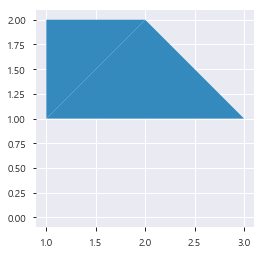

In [45]:
# Initialize a test GeoDataFrame where geometry is a list of points
df = gp.GeoDataFrame( [['box', Point(1, 0)], 
                       ['box', Point(1, 1)], 
                       ['box', Point(2,2)], 
                       ['box', Point(1,2)], 
                       ['triangle', Point(1, 1)], 
                       ['triangle', Point(2,2)], 
                       ['triangle', Point(3,1)]],  
                     columns = ['shape_id', 'geometry'], 
                     geometry='geometry')

# Extract the coordinates from the Point object
df['geometry'] = df['geometry'].apply(lambda x: x.coords[0])

# Group by shape ID 
#  1. Get all of the coordinates for that ID as a list
#  2. Convert that list to a Polygon
df = df.groupby('shape_id')['geometry'].apply(lambda x: Polygon(x.tolist())).reset_index()

# Declare the result as a new a GeoDataFrame
df = gp.GeoDataFrame(df, geometry = 'geometry')

df.plot()